In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
import io
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

In [ ]:
filenya = files.upload()

Saving alldata.csv to alldata (1).csv


In [ ]:
df = pd.read_csv(io.StringIO(filenya['alldata.csv'].decode('utf-8')))
df = df.drop(['Domain'], axis=1) #Drop domain karena domain bukan merupakan features

In [ ]:
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,1,3,0,0,0,0,0
1,0,0,1,3,0,0,0,0,0
2,0,0,1,3,0,0,0,0,0
3,0,0,1,3,0,0,0,0,0
4,0,0,1,3,0,0,0,0,0


In [ ]:
df.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
Label            0
dtype: int64

In [ ]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
count,50235.0,50235.000000,50235.000000,50235.000000,50235.000000,50235.000000,50235.000000,50235.000000,50235.000000
mean,0.0,0.016144,0.865373,3.170339,0.012461,0.000119,0.082691,0.058505,0.295770
std,0.0,0.126031,0.341328,2.081067,0.110934,0.010928,0.275418,0.234698,0.456393
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(50235, 9)

In [ ]:
df.info

<bound method DataFrame.info of        Have_IP  Have_At  URL_Length  ...  TinyURL  Prefix/Suffix  Label
0            0        0           1  ...        0              0      0
1            0        0           1  ...        0              0      0
2            0        0           1  ...        0              0      0
3            0        0           1  ...        0              0      0
4            0        0           1  ...        0              0      0
...        ...      ...         ...  ...      ...            ...    ...
50230        0        0           0  ...        1              0      1
50231        0        0           0  ...        1              0      1
50232        0        0           1  ...        1              0      1
50233        0        0           1  ...        1              0      1
50234        0        0           1  ...        1              0      1

[50235 rows x 9 columns]>

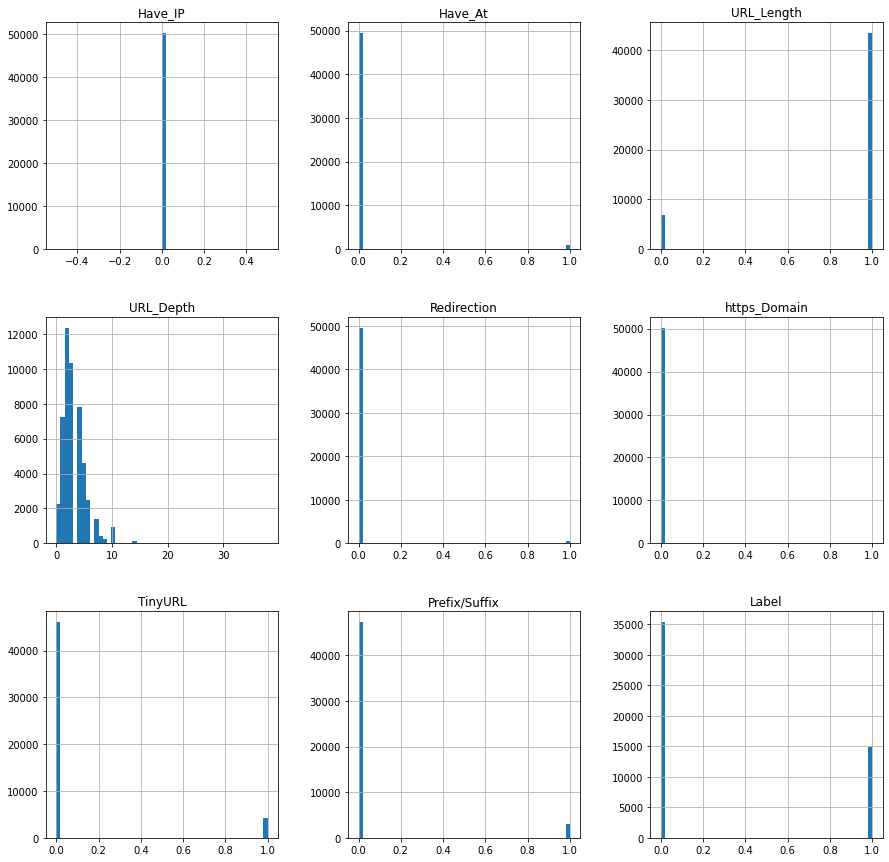

In [ ]:
df.hist(bins = 50,figsize = (15,15));

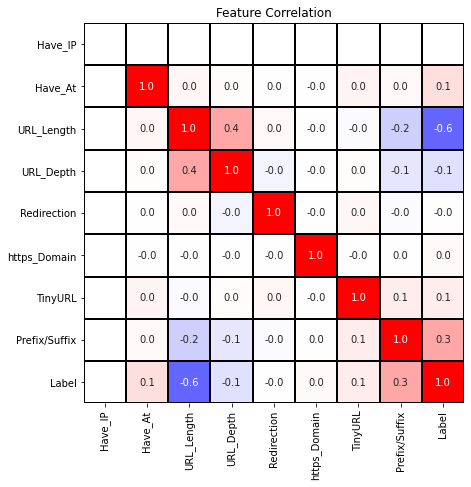

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), cmap="bwr", vmin=-1, vmax=1, square=True, annot=True, fmt=".1f",
            cbar=False, linewidths=1, linecolor='k')
plt.title("Feature Correlation");

In [ ]:
df = df[['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix', 'Label']]

In [ ]:
# Mengacak posisi dataset yang memiliki label 0 dan 1 agar saat di bagi data train dan test memiliki label yang seimbang
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Have_At,URL_Length,URL_Depth,TinyURL,Prefix/Suffix,Label
0,0,1,5,0,0,0
1,0,1,4,0,0,1
2,0,1,5,0,0,1
3,0,1,3,0,0,0
4,0,1,4,0,0,0


In [ ]:
df.columns

Index(['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix',
       'Label'],
      dtype='object')

In [ ]:
# Set Training and Testing Data
X = df[['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix']]
y = df.Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


 


# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40188, 5)
(10047, 5)
(40188,)
(10047,)


In [ ]:
gnb = GaussianNB()
nbtrain = gnb.fit(X_train, y_train)

#Menentukan hasil prediksi dari X_test
y_pred = nbtrain.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(X_test)

array([[9.99998492e-01, 1.50823242e-06],
       [9.99998639e-01, 1.36124872e-06],
       [9.99998600e-01, 1.40031337e-06],
       ...,
       [9.99998492e-01, 1.50823242e-06],
       [9.99997810e-01, 2.19012971e-06],
       [9.99998233e-01, 1.76730862e-06]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      7075
           1       0.96      0.60      0.74      2972

    accuracy                           0.87     10047
   macro avg       0.91      0.80      0.83     10047
weighted avg       0.89      0.87      0.86     10047



In [ ]:
accuracy_train_knn = gnb.score(X_train, y_train)
accuracy_test_knn = gnb.score(X_test, y_test)
print("Akurasi pada Training Set: ", round(accuracy_train_knn*100, 2), '%')
print("Akurasi pada Test Set: ", round(accuracy_test_knn*1000, 2), '%')

Akurasi pada Training Set:  87.27 %
Akurasi pada Test Set:  874.59 %


In [ ]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred)
cm_gnb

array([[6999,   76],
       [1184, 1788]])